In [1]:
from sklearn import preprocessing
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px

from datetime import datetime
import pandas as pd



In [2]:
with open('SampleInput.txt') as f:
    data = f.readlines()


Preprocessing and extraction of columns from the text file


In [3]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
rows = []
for i in data:
    if 'DTG' in i:
        columns.append(i.replace('\n',''))
    elif len(i.split(" "))>5:
        new_list = [j for j in i.split(" ") if j not in ['',0,'\n']]

        date_string = str(new_list[1]) + " " +  str(new_list[0]) + " " +  str(new_list[2]) + " " +  str(new_list[3]) + " " +  str(new_list[4]) + " " +  str(new_list[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[6:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date_str)
        
        
        if new_list[14] == 'ON':
            new_list[14] = 1
        else:
            new_list[14] = 0
            
        if new_list[15] == 'ON':
            new_list[15] = 1
        else:
            new_list[15] = 0
        
        if new_list[16] == 'ON':
            new_list[16] = 1
        else:
            new_list[16] = 0
            
        if new_list[17] == 'SYNC':
            new_list[17] = 1
        else:
            new_list[17] = 0
            
        if new_list[18] == 'NOT_USBL':
            new_list[18] = 0
        else:
            new_list[18] = 1
            
        if new_list[19] == 'ENA':
            new_list[19] = 1
        else:
            new_list[19] = 0
        
        if new_list[20] == 'LOW':
            new_list[20] = 0
        else:
            new_list[20] = 1
            
        if new_list[21] == 'ON':
            new_list[21] = 1
        else:
            new_list[21] = 0
            
        if new_list[22] == 'SYNC':
            new_list[22] = 1
        else:
            new_list[22] = 0
            
            
        rows.append(new_list)


In [5]:
columns = ['Date']+columns[6:]

In [6]:
import pandas as pd
df = pd.DataFrame()

In [7]:
for j in range(len(columns)):
    col_data = []
    for i in rows:        
        if j >= 1:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
display(df)

,Date,DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
0,2018-04-15 17 39 55 043000,22.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00695,0.00769,38.0,52.0,39.0,52.0,0.0,1.0,1.0,0.0
1,2018-04-15 17 39 55 555000,23.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,52.0,39.0,52.0,0.0,1.0,1.0,0.0
2,2018-04-15 17 39 57 091000,26.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,52.0,39.0,52.0,0.0,1.0,1.0,0.0
3,2018-04-15 17 39 58 627000,29.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,52.0,39.0,52.0,0.0,1.0,1.0,0.0
4,2018-04-15 17 40 02 211000,4.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,52.0,39.0,52.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186293,2018-05-18 12 39 42 526000,22.0,-0.0469,-0.0385,0.00577,0.01131,-0.0981,-0.0687,0.00646,0.00799,37.0,51.0,37.0,51.0,0.0,1.0,1.0,0.0
186294,2018-05-18 12 39 43 038000,23.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,37.0,51.0,37.0,51.0,0.0,1.0,1.0,0.0
186295,2018-05-18 12 39 44 574000,26.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,37.0,51.0,37.0,51.0,0.0,1.0,1.0,0.0
186296,2018-05-18 12 39 46 110000,29.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,37.0,51.0,37.0,51.0,0.0,1.0,1.0,0.0


Preprocessed dataset

In [8]:
# copy the data
df_max_scaled = df.copy()

# Convert first column from python string to pandas date object
for column in df_max_scaled.columns[:1]:
    df_max_scaled[column] = pd.to_datetime(df_max_scaled[column], format="%Y-%m-%d %H %M %S %f")

  
# apply normalization techniques
for column in df_max_scaled.columns[1:]:
    if df_max_scaled[column].max() != 1 and df_max_scaled[column].min() != 0:
        df_max_scaled[column] = (df_max_scaled[column] - df_max_scaled[column].min()) / (df_max_scaled[column].max() - df_max_scaled[column].min())    
  

display(df_max_scaled)


,Date,DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
0,2018-04-15 17:39:55.043,0.72,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.533333,0.450593,0.965517,0.97561,0.038076,0.97561,0.0,1.0,1.0,0.0
1,2018-04-15 17:39:55.555,0.76,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.529317,0.450593,0.965517,0.97561,0.038076,0.97561,0.0,1.0,1.0,0.0
2,2018-04-15 17:39:57.091,0.88,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.529317,0.450593,0.965517,0.97561,0.038076,0.97561,0.0,1.0,1.0,0.0
3,2018-04-15 17:39:58.627,1.00,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.529317,0.450593,0.965517,0.97561,0.038076,0.97561,0.0,1.0,1.0,0.0
4,2018-04-15 17:40:02.211,0.00,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.529317,0.450593,0.965517,0.97561,0.038076,0.97561,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186293,2018-05-18 12:39:42.526,0.72,0.47191,0.225,0.478094,0.517483,0.086957,0.548387,0.493976,0.474308,0.931034,0.95122,0.036072,0.95122,0.0,1.0,1.0,0.0
186294,2018-05-18 12:39:43.038,0.76,0.47191,0.225,0.481937,0.517483,0.086957,0.548387,0.497992,0.478261,0.931034,0.95122,0.036072,0.95122,0.0,1.0,1.0,0.0
186295,2018-05-18 12:39:44.574,0.88,0.47191,0.225,0.481937,0.517483,0.086957,0.548387,0.497992,0.478261,0.931034,0.95122,0.036072,0.95122,0.0,1.0,1.0,0.0
186296,2018-05-18 12:39:46.110,1.00,0.47191,0.225,0.481937,0.517483,0.086957,0.548387,0.497992,0.478261,0.931034,0.95122,0.036072,0.95122,0.0,1.0,1.0,0.0


In [9]:
df_max_scaled.set_index('Date', inplace=True)

# Resample 
df_sample = df_max_scaled.resample('D').mean()
display(df_sample)

# Check if data is correct
from adtk.data import validate_series
df_max_scaled = validate_series(df_sample)
                                


,DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,
2018-04-15,0.615257,0.471910,0.225000,0.466744,0.498916,0.091994,0.548038,0.510062,0.465135,0.962532,0.983373,0.038033,0.971387,0.0,1.000000,1.000000,0.0
2018-04-16,0.615116,0.471402,0.225408,0.464783,0.503054,0.090791,0.547368,0.504899,0.463309,0.947705,0.977815,0.037841,0.964059,0.0,1.000000,1.000000,0.0
2018-04-17,0.615112,0.471438,0.225363,0.466312,0.506075,0.090160,0.547566,0.508573,0.464961,0.931636,0.970570,0.037180,0.957363,0.0,1.000000,1.000000,0.0
2018-04-18,0.615152,0.471635,0.224510,0.468575,0.500009,0.090143,0.547690,0.504712,0.467092,0.938764,0.971131,0.037500,0.960728,0.0,1.000000,1.000000,0.0
2018-04-19,0.615464,0.471545,0.224553,0.465785,0.501144,0.090770,0.547456,0.508085,0.464539,0.943964,0.976096,0.037654,0.963084,0.0,1.000000,1.000000,0.0
2018-04-20,0.614691,0.471687,0.225000,0.465367,0.501473,0.089482,0.547820,0.501629,0.463962,0.930962,0.968166,0.037147,0.955927,0.0,1.000000,1.000000,0.0
2018-04-21,0.615448,0.471682,0.223606,0.467845,0.497473,0.089866,0.547699,0.502169,0.466493,0.942096,0.972100,0.037626,0.962249,0.0,1.000000,1.000000,0.0
2018-04-22,0.614863,0.471320,0.225296,0.466133,0.503872,0.089849,0.547465,0.504062,0.464801,0.938240,0.969338,0.037430,0.958674,0.0,1.000000,1.000000,0.0
2018-04-23,0.614271,0.471514,0.224626,0.465421,0.501519,0.090492,0.547702,0.503597,0.463925,0.931224,0.966577,0.037170,0.955149,0.0,1.000000,1.000000,0.0


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

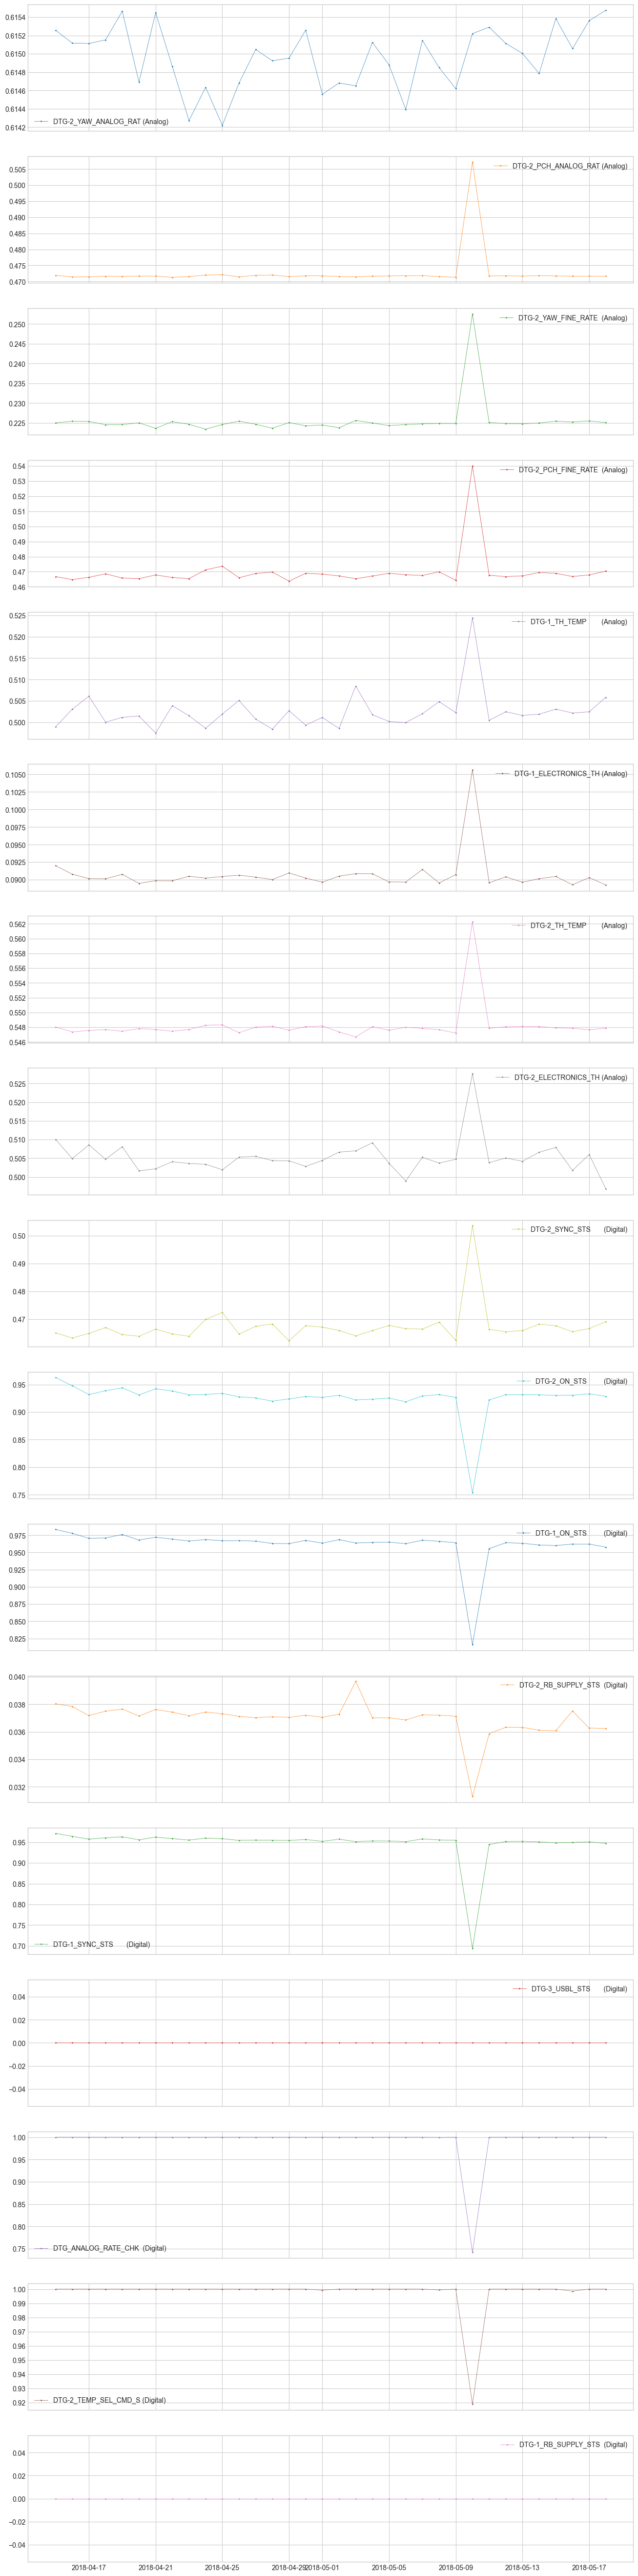

In [10]:
# We use the plot function from adtk to plot time series data
from adtk.visualization import plot
plot(df_sample)

In [11]:
from adtk.detector import AutoregressionAD

def myDetectionFunc(df):
    ano = pd.Series()
    for column in df.columns[1:]:
        ar = AutoregressionAD(c=200.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        ano = ano | ar
    return ano


C:\Users\reach\AppData\Local\Temp\ipykernel_8944\3791010277.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ano = pd.Series()


<class 'pandas.core.series.Series'>
DatetimeIndex(['2018-05-10'], dtype='datetime64[ns]', name='Date', freq='D')


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

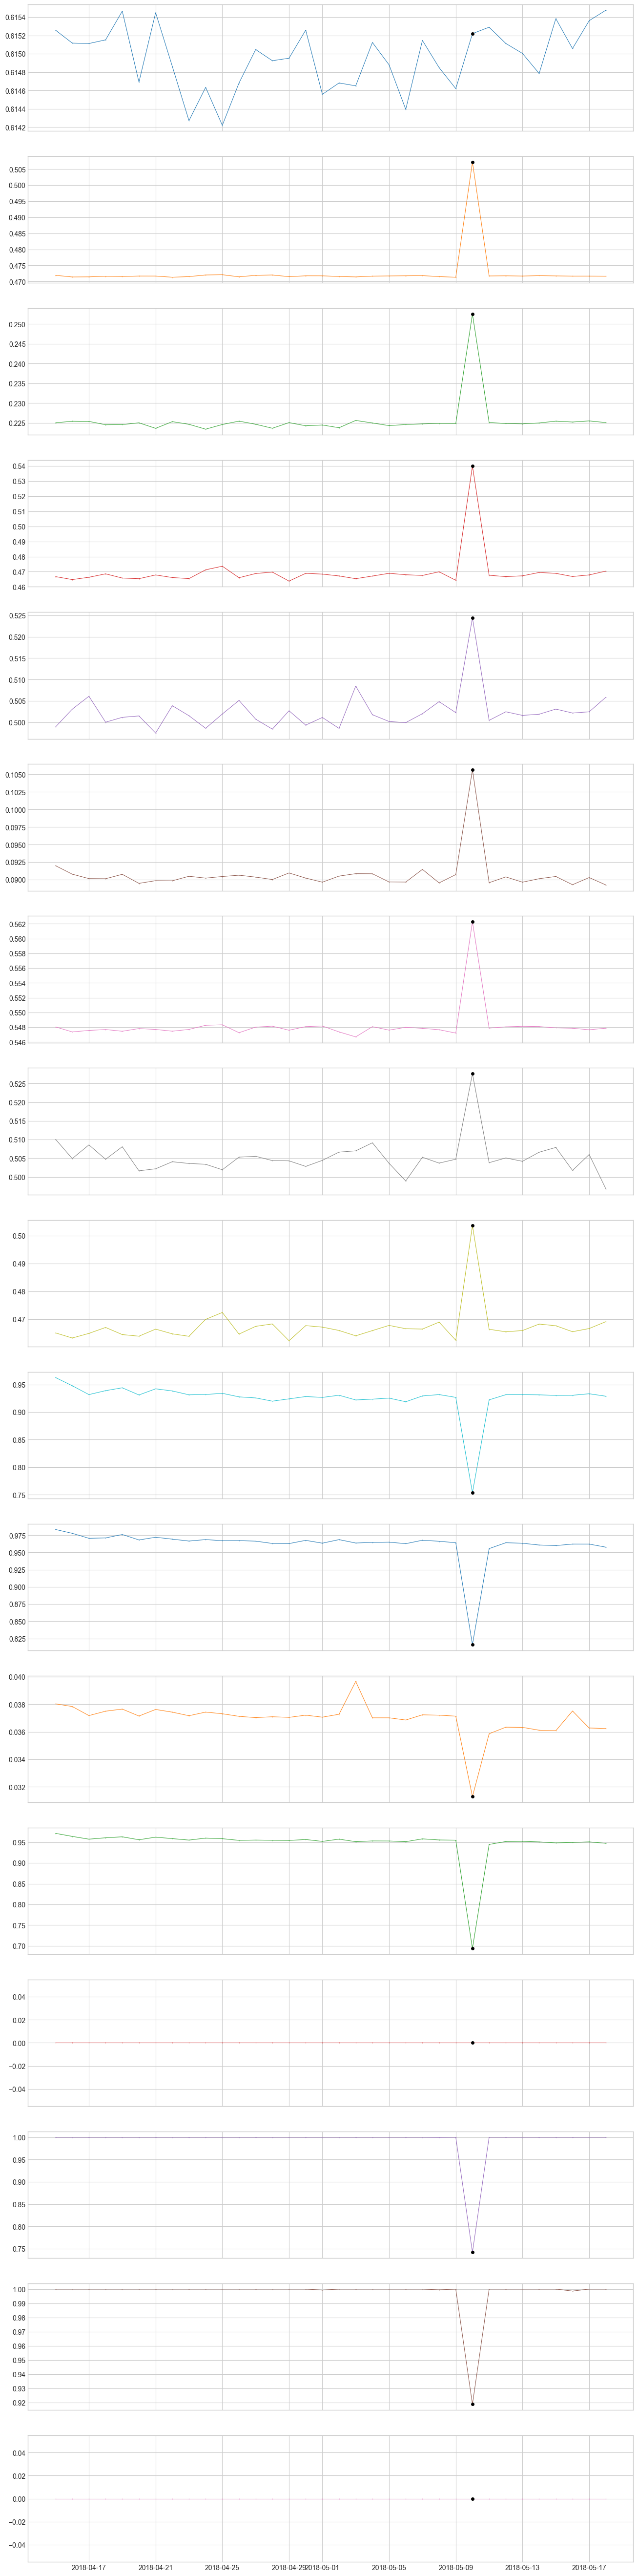

In [12]:
from adtk.detector import CustomizedDetectorHD
customized_detector = CustomizedDetectorHD(detect_func=myDetectionFunc)
anomalies = customized_detector.detect(df_sample)
print(type(anomalies))
print(anomalies[anomalies].index)
plot(df_sample,legend=False, anomaly=anomalies, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black')

[<AxesSubplot: >]

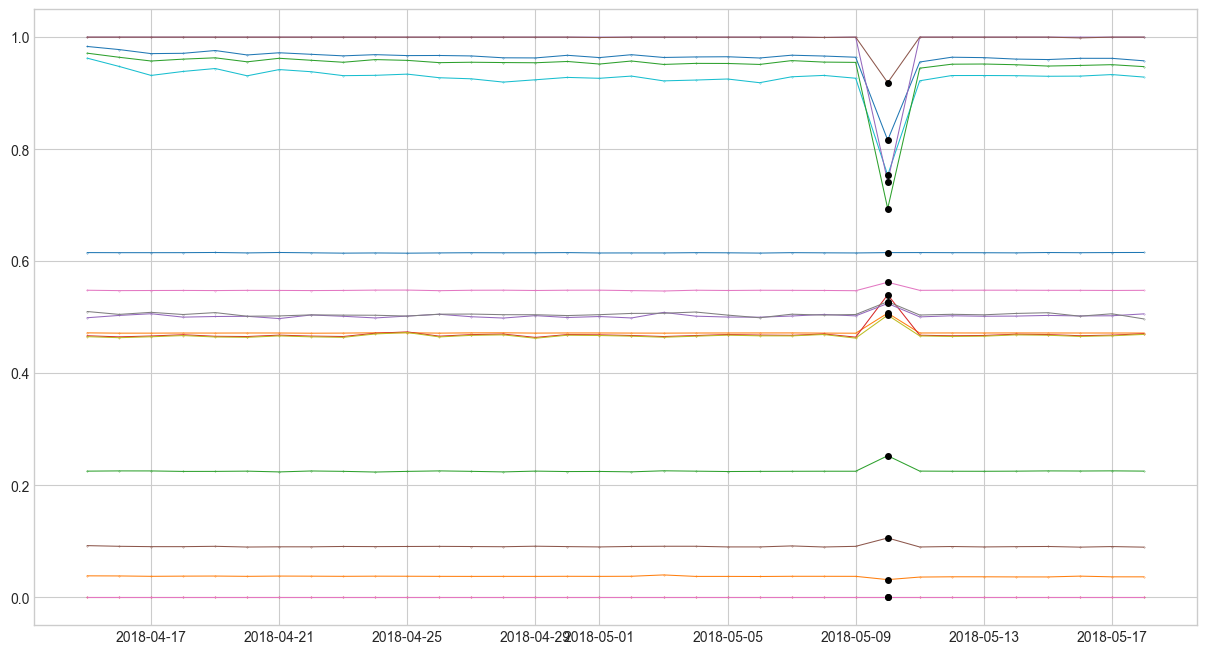

In [13]:
plot(df_sample,figsize=(15,8),legend=False, anomaly=anomalies, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black', curve_group='all')

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

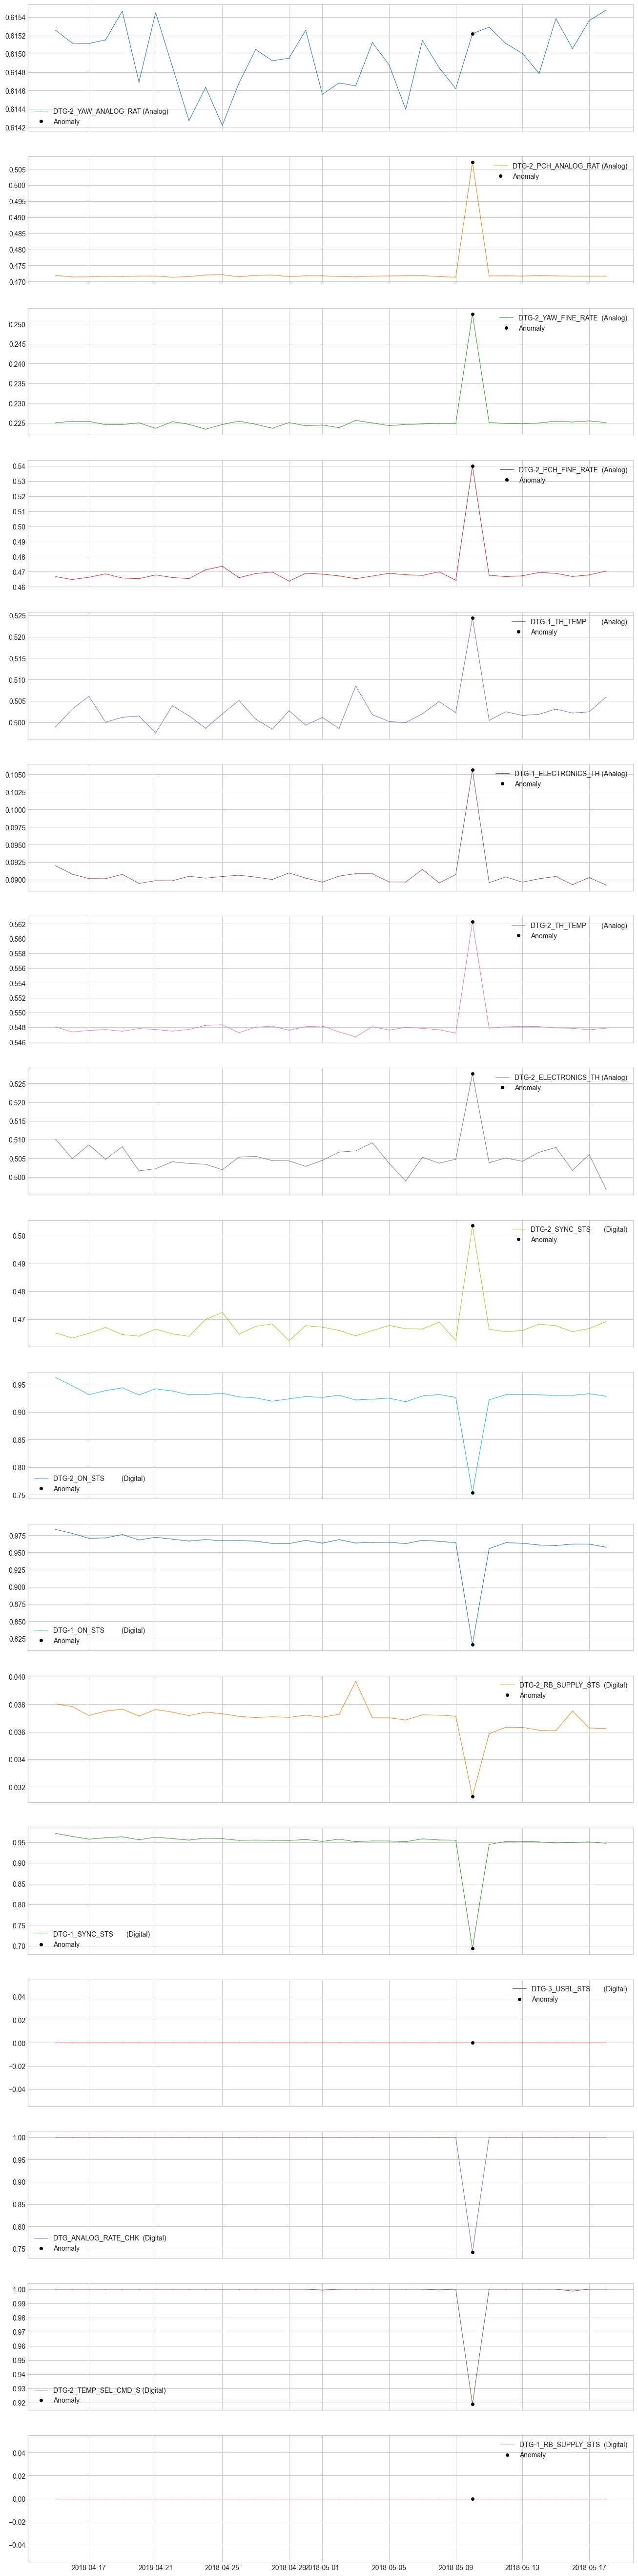

In [14]:
plot(df_sample,anomaly=anomalies, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black')

2018-05-10


,DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,
2018-05-10 00:00:00,0.634839,0.47191,0.184211,0.480573,0.517483,0.125000,0.222222,0.510040,0.479281,0.988270,0.987903,0.023374,0.975,0.0,1.0,1.0,0.0
2018-05-10 00:01:00,0.566316,0.47191,0.184211,0.478094,0.517483,0.140351,0.222222,0.510040,0.478261,1.000000,0.989474,0.023374,0.975,0.0,1.0,1.0,0.0
2018-05-10 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10 00:03:00,0.615000,0.47191,0.184211,0.476653,0.517483,0.145833,0.222222,0.511546,0.476779,1.000000,1.000000,0.023374,0.975,0.0,1.0,1.0,0.0
2018-05-10 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-10 23:54:00,0.940000,0.47191,0.184211,0.451191,0.494172,0.125000,0.222222,0.478715,0.446640,0.909091,0.950000,0.020325,0.925,0.0,1.0,1.0,0.0
2018-05-10 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10 23:56:00,0.615000,0.47191,0.184211,0.448021,0.495629,0.125000,0.222222,0.475703,0.445158,0.909091,0.950000,0.020325,0.925,0.0,1.0,1.0,0.0


C:\Users\reach\AppData\Local\Temp\ipykernel_8944\2425924959.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ano = pd.Series()


<class 'pandas.core.series.Series'>
DatetimeIndex(['2018-05-10 14:25:00', '2018-05-10 14:26:00',
               '2018-05-10 14:28:00', '2018-05-10 14:29:00',
               '2018-05-10 14:30:00', '2018-05-10 14:31:00',
               '2018-05-10 14:32:00', '2018-05-10 14:33:00',
               '2018-05-10 14:34:00', '2018-05-10 14:35:00',
               '2018-05-10 14:36:00', '2018-05-10 14:39:00',
               '2018-05-10 14:50:00', '2018-05-10 15:01:00',
               '2018-05-10 15:02:00', '2018-05-10 15:03:00',
               '2018-05-10 15:14:00', '2018-05-10 15:19:00',
               '2018-05-10 15:20:00', '2018-05-10 15:25:00',
               '2018-05-10 15:38:00', '2018-05-10 15:41:00',
               '2018-05-10 15:42:00', '2018-05-10 15:43:00',
               '2018-05-10 15:44:00', '2018-05-10 15:45:00',
               '2018-05-10 15:46:00', '2018-05-10 15:47:00',
               '2018-05-10 15:48:00', '2018-05-10 15:49:00'],
              dtype='datetime64[ns]', name='Date

[<AxesSubplot: >]

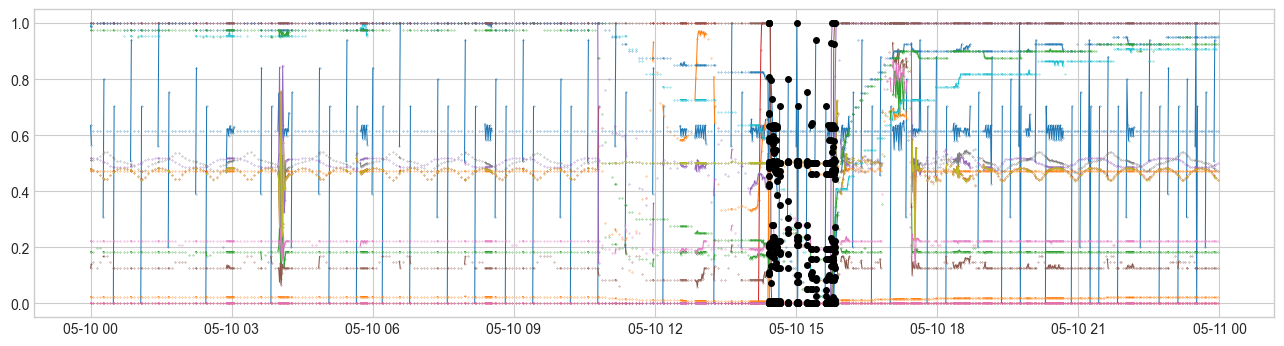

In [16]:

from adtk.detector import AutoregressionAD
date_of_anomaly = anomalies[anomalies].index[0]
date_of_anomaly = str(date_of_anomaly).split()[0]
print(date_of_anomaly)
# copy the data
df_510 = df.copy()

df_510 = df_510[df_510['Date'].str.contains(date_of_anomaly)]
# Convert first column from python string to pandas date object
for column in df_510.columns[:1]:
    df_510[column] = pd.to_datetime(df_510[column], format="%Y-%m-%d %H %M %S %f")

  
# apply normalization techniques
for column in df_510.columns[1:]:
    if df_510[column].max() != 1 and df_510[column].min() != 0:
        df_510[column] = (df_510[column] - df_510[column].min()) / (df_510[column].max() - df_510[column].min())    

df_510.set_index('Date', inplace=True)

df_510_r = df_510.resample('T').mean()
display(df_510_r)

df_510_r.fillna(0)
def myDetectionFunc1(df):
    ano = pd.Series()
    for column in df.columns[1:]:
        ar = AutoregressionAD(c=100.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        ano = ano | ar
    return ano


from adtk.detector import CustomizedDetectorHD
customized_detector = CustomizedDetectorHD(detect_func=myDetectionFunc1)
anomalies1 = customized_detector.detect(df_510_r)
print(type(anomalies1))
print(anomalies1[anomalies1].index)
plot(df_510_r,legend=False, anomaly=anomalies1, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black', curve_group='all')

